# Análisis del Mercado Eléctrico Italiano

## Contexto
Este análisis se basa en un conjunto de datos sobre el mercado eléctrico italiano, disponible en Kaggle. El dataset cubre el periodo de 2012 a 2022 y proporciona información sobre la demanda de electricidad, las fuentes de producción de energía y los precios de la electricidad en Italia. Durante este periodo, Italia ha enfrentado una transición energética debido a cambios en la oferta y la demanda de energía, impulsados por factores como las interrupciones en el suministro de gas, la mayor inversión en energías renovables y las tensiones geopolíticas. Estos cambios son cruciales para comprender las variaciones en la demanda de electricidad.

El objetivo de este análisis es explorar y entender cómo ha evolucionado la demanda eléctrica a lo largo de los años, comparando las distintas regiones del país y realizando predicciones sobre la futura demanda. Este análisis es clave para la optimización de la producción y distribución de energía.

## Archivos del Dataset
El conjunto de datos está compuesto por varios archivos CSV que contienen información específica sobre la producción, la demanda y los precios de la electricidad en Italia. A continuación se describen los archivos y sus características:

1. **`it_electricity_demand_adj.csv`** (7.94 MB)
   - **Descripción**: Contiene datos ajustados sobre la demanda eléctrica horaria en Italia durante el período cubierto (2012-2022).
   - **Características**: Detalla el consumo de electricidad por hora en diferentes regiones de Italia (por ejemplo, Norte, Sur, Centro-Norte, etc.).

2. **`it_electricity_prices_adj.csv`** (11.97 MB)
   - **Descripción**: Contiene información sobre los precios horarios de la electricidad en Italia, ajustados para reflejar las tendencias económicas.
   - **Características**: Información sobre el precio de la electricidad por megavatio hora (€/MWh), lo que permite observar las fluctuaciones de los precios a lo largo del tiempo.

3. **`electricity-prod-source-stacked.csv`** (377.27 KB)
   - **Descripción**: Proporciona información sobre la producción de electricidad en Italia, desglosada por fuente de energía (renovables, fósiles, etc.).
   - **Características**: Contiene la proporción de electricidad generada por cada tipo de fuente de energía, lo que es esencial para comprender cómo varía la oferta de electricidad según las fuentes de energía.

4. **`NYMEX_DL_TTF1_1D.csv`** (73.38 KB)
   - **Descripción**: Contiene datos sobre los futuros continuos del gas natural holandés (Dutch Natural Gas Continuous Future), que es relevante para entender los precios de la energía en Europa.
   - **Características**: Datos de precios futuros del gas natural, lo cual puede influir en el precio de la electricidad.
   

In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Cargar los datos
demanda_electrica_horaria_it_df = pd.read_csv('it_electricity_demand_adj.csv', index_col=None)
prices_electricidad_ph_df = pd.read_csv('it_electricity_prices_adj.csv', index_col=None)
prod_electricidad__df = pd.read_csv('electricity-prod-source-stacked.csv', index_col=None)
gas_precios_futuros_df = pd.read_csv('NYMEX_DL_TTF1 1D.csv')




### LIMPIAR Y ANALIZAR EL PRIMER DATASET

In [200]:
print('Info dataset demanda electrica horaria en Italia desde 2012 a 2022:')
print(demanda_electrica_horaria_it_df.info())

Info dataset demanda electrica horaria en Italia desde 2012 a 2022:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93504 entries, 0 to 93503
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  93504 non-null  object 
 1   Italia      93504 non-null  float64
 2   CNOR        93504 non-null  float64
 3   CSUD        93504 non-null  float64
 4   NORD        93504 non-null  float64
 5   SARD        93504 non-null  float64
 6   SICI        93504 non-null  float64
 7   SUD         93504 non-null  float64
dtypes: float64(7), object(1)
memory usage: 5.7+ MB
None


In [201]:
# Convertir la columna 'Unnamed: 0' a formato de fecha y hora
demanda_electrica_horaria_it_df['Unnamed: 0'] = pd.to_datetime(demanda_electrica_horaria_it_df['Unnamed: 0'])

# renombrar la columna "Unnamed" a "datetime"
demanda_electrica_horaria_it_df = demanda_electrica_horaria_it_df.rename(columns={
    'Unnamed: 0': 'DATE', 
    'Italia': 'ITALIA_DEMAND',
    'CNOR': 'CNOR_DEMAND',
    'CSUD': 'CSUD_DEMAND',
    'NORD': 'NORD_DEMAND',
    'SARD':'SARD_DEMAND',
    'SICI':'SICI_DEMAND',
    'SUD':'SUD_DEMAND'})

# Verificar la conversión y la estructura de los datos
print(demanda_electrica_horaria_it_df.info())
print('--------------------------------------------------------------------------------------------------------------------------')
print(demanda_electrica_horaria_it_df.head())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93504 entries, 0 to 93503
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DATE           93504 non-null  datetime64[ns]
 1   ITALIA_DEMAND  93504 non-null  float64       
 2   CNOR_DEMAND    93504 non-null  float64       
 3   CSUD_DEMAND    93504 non-null  float64       
 4   NORD_DEMAND    93504 non-null  float64       
 5   SARD_DEMAND    93504 non-null  float64       
 6   SICI_DEMAND    93504 non-null  float64       
 7   SUD_DEMAND     93504 non-null  float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 5.7 MB
None
--------------------------------------------------------------------------------------------------------------------------
                 DATE  ITALIA_DEMAND  CNOR_DEMAND  CSUD_DEMAND  NORD_DEMAND  \
0 2012-01-01 01:00:00      24659.161     2662.703     4534.718    11693.113   
1 2012-01-01 02:00:00      23387.590 

In [202]:
# Comprobar si hay valores nulos en demanda_electrica_horaria_it_df
print('VALORES NULOS:')
print(demanda_electrica_horaria_it_df.isnull().sum())
print('-----------------------------------------------------------------------------------')
print(demanda_electrica_horaria_it_df.describe())

VALORES NULOS:
DATE             0
ITALIA_DEMAND    0
CNOR_DEMAND      0
CSUD_DEMAND      0
NORD_DEMAND      0
SARD_DEMAND      0
SICI_DEMAND      0
SUD_DEMAND       0
dtype: int64
-----------------------------------------------------------------------------------
                      DATE  ITALIA_DEMAND   CNOR_DEMAND   CSUD_DEMAND  \
count                93504   93504.000000  93504.000000  93504.000000   
mean   2017-05-02 00:30:00   32519.967098   3287.953532   5247.286205   
min    2012-01-01 01:00:00   16272.977000   1550.070000   2580.443000   
25%    2014-09-01 00:45:00   26502.196750   2643.802000   4318.080750   
50%    2017-05-02 00:30:00   32016.382500   3224.852000   5258.185500   
75%    2020-01-01 00:15:00   38450.967750   3913.896750   6099.085000   
max    2022-09-01 00:00:00   50393.780000   6007.450000   8899.763000   
std                    NaN    6818.933965    791.864286   1128.337246   

        NORD_DEMAND   SARD_DEMAND   SICI_DEMAND    SUD_DEMAND  
count  93504.0

In [203]:
# funciones para definir estación y momento del día
def asignar_estacion_en_ingles(mes):
    if mes in [12, 1, 2]:
        return 'Winter'
    elif mes in [3, 4, 5]:
        return 'Spring'
    elif mes in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'
    
def asignar_momento_dia_en_ingles(hora):
    if hora >= 0 and hora < 6:
        return 'Night'
    elif hora >= 6 and hora < 12:
        return 'Morning'
    elif hora >= 12 and hora < 18:
        return 'Afternoon'    
    else:
        return 'Evening'
    
# Añadir las columnas 'estaciòn', 'momento del dia', 'año' y 'mes' al dataframe.
demanda_electrica_horaria_it_df['YEAR'] = demanda_electrica_horaria_it_df['DATE'].dt.year
demanda_electrica_horaria_it_df['MONTH'] = demanda_electrica_horaria_it_df['DATE'].dt.month_name()
demanda_electrica_horaria_it_df['SEASON'] = demanda_electrica_horaria_it_df['DATE'].dt.month.apply(asignar_estacion_en_ingles)
demanda_electrica_horaria_it_df['TIME_OF_DAY'] = demanda_electrica_horaria_it_df['DATE'].dt.hour.apply(asignar_momento_dia_en_ingles)

print(demanda_electrica_horaria_it_df)


                     DATE  ITALIA_DEMAND  CNOR_DEMAND  CSUD_DEMAND  \
0     2012-01-01 01:00:00      24659.161     2662.703     4534.718   
1     2012-01-01 02:00:00      23387.590     2539.670     4240.313   
2     2012-01-01 03:00:00      22090.760     2403.112     3927.174   
3     2012-01-01 04:00:00      21009.116     2267.737     3692.188   
4     2012-01-01 05:00:00      20350.988     2186.529     3569.043   
...                   ...            ...          ...          ...   
93499 2022-08-31 20:00:00      39234.945     3450.666     6835.219   
93500 2022-08-31 21:00:00      39005.320     3417.592     6790.829   
93501 2022-08-31 22:00:00      38956.535     3358.284     6855.084   
93502 2022-08-31 23:00:00      37077.835     3172.588     6478.296   
93503 2022-09-01 00:00:00      34155.930     2868.968     5940.663   

       NORD_DEMAND  SARD_DEMAND  SICI_DEMAND  SUD_DEMAND  YEAR      MONTH  \
0        11693.113     1460.687     2013.582    2294.358  2012    January   
1    

In [204]:
# Eliminar las filas correspondientes al año 2022 que no esta completo, los datos llegan hasta el 1 de Septiembre 2022
demanda_electrica_horaria_it_df = demanda_electrica_horaria_it_df[demanda_electrica_horaria_it_df['YEAR'] < 2022]

# Verificar que las filas de 2022 han sido eliminadas
print(demanda_electrica_horaria_it_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 87671 entries, 0 to 87670
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DATE           87671 non-null  datetime64[ns]
 1   ITALIA_DEMAND  87671 non-null  float64       
 2   CNOR_DEMAND    87671 non-null  float64       
 3   CSUD_DEMAND    87671 non-null  float64       
 4   NORD_DEMAND    87671 non-null  float64       
 5   SARD_DEMAND    87671 non-null  float64       
 6   SICI_DEMAND    87671 non-null  float64       
 7   SUD_DEMAND     87671 non-null  float64       
 8   YEAR           87671 non-null  int32         
 9   MONTH          87671 non-null  object        
 10  SEASON         87671 non-null  object        
 11  TIME_OF_DAY    87671 non-null  object        
dtypes: datetime64[ns](1), float64(7), int32(1), object(3)
memory usage: 8.4+ MB
None


### LIMPIAR Y ANALIZAR EL SEGUNDO DATASET

In [205]:

print('Info dataset precios horarios electricidad en Italia:')
print(prices_electricidad_ph_df.info())


Info dataset precios horarios electricidad en Italia:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93504 entries, 0 to 93503
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  93504 non-null  object 
 1   PUN         93504 non-null  float64
 2   NAT         93504 non-null  float64
 3   CNOR        93504 non-null  float64
 4   CSUD        93504 non-null  float64
 5   NORD        93504 non-null  float64
 6   SARD        93504 non-null  float64
 7   SICI        93504 non-null  float64
 8   SUD         93504 non-null  float64
 9   AUST        93504 non-null  float64
 10  COAC        93504 non-null  float64
 11  CORS        93504 non-null  float64
 12  FRAN        93504 non-null  float64
 13  GREC        93504 non-null  float64
 14  SLOV        93504 non-null  float64
 15  SVIZ        93504 non-null  float64
 16  BSP         93504 non-null  float64
 17  CALA        744 non-null    float64
 18  COUP        

In [206]:
# VAMOS A EXTRAER SOLO LAS COLUMNAS QUE NOS INTERESAN Y LAS VAMOS A RENOMBRAR

columnas_a_analizar = ['Unnamed: 0', 'PUN', 'NAT', 'CNOR', 'CSUD', 'NORD', 'SARD', 'SICI', 'SUD']
nuevos_nombres = {
    'Unnamed: 0': 'DATE',
    'PUN': 'UNIQUE_NATIONAL_PRICE',
    'NAT': 'UNCONSTRAINED_PRICE',
    'CNOR': 'NORD_CENTER_PRICE',
    'CSUD': 'SUD_CENTER_PRICE',
    'NORD': 'NORD_PRICE',
    'SARD': 'SARDINA_PRICE',
    'SICI': 'SICILY_PRICE',
    'SUD': 'SUD_PRICE'
}

# actualizar el dataframe con las columnas seleccionadas
prices_electricidad_ph_df = prices_electricidad_ph_df[columnas_a_analizar].rename(columns=nuevos_nombres)

# Convertir la columna DATE a formato datetime
prices_electricidad_ph_df['DATE'] = pd.to_datetime(prices_electricidad_ph_df['DATE'])

print(prices_electricidad_ph_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93504 entries, 0 to 93503
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   DATE                   93504 non-null  datetime64[ns]
 1   UNIQUE_NATIONAL_PRICE  93504 non-null  float64       
 2   UNCONSTRAINED_PRICE    93504 non-null  float64       
 3   NORD_CENTER_PRICE      93504 non-null  float64       
 4   SUD_CENTER_PRICE       93504 non-null  float64       
 5   NORD_PRICE             93504 non-null  float64       
 6   SARDINA_PRICE          93504 non-null  float64       
 7   SICILY_PRICE           93504 non-null  float64       
 8   SUD_PRICE              93504 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 6.4 MB
None


In [207]:
# Comprobar si hay valores nulos en prices_electricidad_ph_df
print('VALORES NULOS:')
print(prices_electricidad_ph_df.isnull().sum())
print('-----------------------------------------------------------------------------------')
print(prices_electricidad_ph_df.describe())

VALORES NULOS:
DATE                     0
UNIQUE_NATIONAL_PRICE    0
UNCONSTRAINED_PRICE      0
NORD_CENTER_PRICE        0
SUD_CENTER_PRICE         0
NORD_PRICE               0
SARDINA_PRICE            0
SICILY_PRICE             0
SUD_PRICE                0
dtype: int64
-----------------------------------------------------------------------------------
                      DATE  UNIQUE_NATIONAL_PRICE  UNCONSTRAINED_PRICE  \
count                93504           93504.000000         93504.000000   
mean   2017-05-02 00:30:00              77.307662            76.245255   
min    2012-01-01 01:00:00               0.000000             0.000000   
25%    2014-09-01 00:45:00              43.785658            43.000000   
50%    2017-05-02 00:30:00              56.000000            55.000000   
75%    2020-01-01 00:15:00              73.214997            71.430000   
max    2022-09-01 00:00:00             870.000000          3000.000000   
std                    NaN              78.206100    

In [208]:
# Añadir las columnas 'estaciòn', 'momento del dia', 'año' y 'mes' al dataframe.
prices_electricidad_ph_df['YEAR'] = prices_electricidad_ph_df['DATE'].dt.year
prices_electricidad_ph_df['MONTH'] = prices_electricidad_ph_df['DATE'].dt.month_name()
prices_electricidad_ph_df['SEASON'] = prices_electricidad_ph_df['DATE'].dt.month.apply(asignar_estacion_en_ingles)
prices_electricidad_ph_df['TIME_OF_DAY'] = prices_electricidad_ph_df['DATE'].dt.hour.apply(asignar_momento_dia_en_ingles)

print(prices_electricidad_ph_df)

                     DATE  UNIQUE_NATIONAL_PRICE  UNCONSTRAINED_PRICE  \
0     2012-01-01 01:00:00              82.813341                76.29   
1     2012-01-01 02:00:00              75.767425                65.80   
2     2012-01-01 03:00:00              59.919853                60.00   
3     2012-01-01 04:00:00              59.920928                59.03   
4     2012-01-01 05:00:00              59.010000                59.00   
...                   ...                    ...                  ...   
93499 2022-08-31 20:00:00             672.870080               677.88   
93500 2022-08-31 21:00:00             743.531820               744.00   
93501 2022-08-31 22:00:00             759.990000               759.99   
93502 2022-08-31 23:00:00             706.072680               706.48   
93503 2022-09-01 00:00:00             639.300000               639.30   

       NORD_CENTER_PRICE  SUD_CENTER_PRICE  NORD_PRICE  SARDINA_PRICE  \
0               83.95000          83.95000    83.9

In [209]:
# VAMOS A QUITAR TODOS LOS DATOS DEL 2022 QUE NO ESTÀ COMPLETO,SOLO TENEMOS DATOS HASTA EL 1 DE SEPTIEMBRE 2022

prices_electricidad_ph_df = prices_electricidad_ph_df[prices_electricidad_ph_df['YEAR'] < 2022]

# VERIFICAMOS QUE EL 2022 HA SIDO ELIMINADO DEL DATAFRAME

print(prices_electricidad_ph_df.tail())

                     DATE  UNIQUE_NATIONAL_PRICE  UNCONSTRAINED_PRICE  \
87666 2021-12-31 19:00:00                 221.76               221.76   
87667 2021-12-31 20:00:00                 219.14               219.14   
87668 2021-12-31 21:00:00                 213.60               213.60   
87669 2021-12-31 22:00:00                 192.79               192.79   
87670 2021-12-31 23:00:00                 180.00               180.00   

       NORD_CENTER_PRICE  SUD_CENTER_PRICE  NORD_PRICE  SARDINA_PRICE  \
87666             221.76            221.76      221.76         221.76   
87667             219.14            219.14      219.14         219.14   
87668             213.60            213.60      213.60         213.60   
87669             192.79            192.79      192.79         192.79   
87670             180.00            180.00      180.00         180.00   

       SICILY_PRICE  SUD_PRICE  YEAR     MONTH  SEASON TIME_OF_DAY  
87666        221.76     221.76  2021  December  Winte

### LIMPIAR Y ANALIZAR EL TERCER DATAFRAME

In [210]:
print('Info dataset producción energia electrica en Italia por fuente de energia:')
print(prod_electricidad__df.info())


Info dataset producción energia electrica en Italia por fuente de energia:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7995 entries, 0 to 7994
Data columns (total 11 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Entity                                                       7995 non-null   object 
 1   Code                                                         7038 non-null   object 
 2   Year                                                         7995 non-null   int64  
 3   Electricity from coal (TWh)                                  5747 non-null   float64
 4   Electricity from gas (TWh)                                   5748 non-null   float64
 5   Electricity from hydro (TWh)                                 7994 non-null   float64
 6   Electricity from other renewables including bioenergy (TWh)  7989 non-null   float64
 7   Ele

In [211]:
# en primer lugar vamos a extraer solo las filas donde el entity es igual a Italy
prod_electricidad__df = prod_electricidad__df[prod_electricidad__df['Entity'] == 'Italy']
print(prod_electricidad__df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 57 entries, 3556 to 3612
Data columns (total 11 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Entity                                                       57 non-null     object 
 1   Code                                                         57 non-null     object 
 2   Year                                                         57 non-null     int64  
 3   Electricity from coal (TWh)                                  37 non-null     float64
 4   Electricity from gas (TWh)                                   37 non-null     float64
 5   Electricity from hydro (TWh)                                 57 non-null     float64
 6   Electricity from other renewables including bioenergy (TWh)  57 non-null     float64
 7   Electricity from solar (TWh)                                 57 non-null     float

In [212]:
# Comprobar si hay valores nulos en demanda_electrica_horaria_it_df
print('VALORES NULOS:')
print(prod_electricidad__df.isnull().sum())



VALORES NULOS:
Entity                                                          0
Code                                                            0
Year                                                            0
Electricity from coal (TWh)                                    20
Electricity from gas (TWh)                                     20
Electricity from hydro (TWh)                                    0
Electricity from other renewables including bioenergy (TWh)     0
Electricity from solar (TWh)                                    0
Electricity from oil (TWh)                                     20
Electricity from wind (TWh)                                     0
Electricity from nuclear (TWh)                                  0
dtype: int64


In [213]:

# en este caso vamos a poner 0.0 como float en cambio de los nulos

prod_electricidad__df = prod_electricidad__df.fillna(float(0.0))
print(prod_electricidad__df.isnull().sum())


Entity                                                         0
Code                                                           0
Year                                                           0
Electricity from coal (TWh)                                    0
Electricity from gas (TWh)                                     0
Electricity from hydro (TWh)                                   0
Electricity from other renewables including bioenergy (TWh)    0
Electricity from solar (TWh)                                   0
Electricity from oil (TWh)                                     0
Electricity from wind (TWh)                                    0
Electricity from nuclear (TWh)                                 0
dtype: int64


In [214]:
# vamos a organizar el dataframe quitando las columnas que ya no intersan como del entity  y del code
columnas_a_selecionar = [
    'Year', 
    'Electricity from coal (TWh)', 
    'Electricity from gas (TWh)', 
    'Electricity from hydro (TWh)', 
    'Electricity from other renewables including bioenergy (TWh)', 
    'Electricity from solar (TWh)', 
    'Electricity from oil (TWh)', 
    'Electricity from wind (TWh)', 
    'Electricity from nuclear (TWh)'
]

prod_electricidad__df = prod_electricidad__df[columnas_a_selecionar]

# resetear el index
prod_electricidad__df = prod_electricidad__df.reset_index(drop=True)
print(prod_electricidad__df.head())



   Year  Electricity from coal (TWh)  Electricity from gas (TWh)  \
0  1985                       30.023                      24.712   
1  1986                       31.004                      26.871   
2  1987                       33.035                      31.732   
3  1988                       33.897                      32.420   
4  1989                       31.867                      34.407   

   Electricity from hydro (TWh)  \
0                        41.092   
1                        41.096   
2                        39.505   
3                        40.676   
4                        34.057   

   Electricity from other renewables including bioenergy (TWh)  \
0                                              3.212             
1                                              3.501             
2                                              3.693             
3                                              3.787             
4                                              3.1

In [215]:
# pasar los valores de TWh a MWh
columns_to_convert = [
    'Electricity from coal (TWh)', 
    'Electricity from gas (TWh)', 
    'Electricity from hydro (TWh)', 
    'Electricity from other renewables including bioenergy (TWh)', 
    'Electricity from solar (TWh)', 
    'Electricity from oil (TWh)', 
    'Electricity from wind (TWh)', 
    'Electricity from nuclear (TWh)'
]

for col in columns_to_convert:
    prod_electricidad__df[col] *= 1000000
    

# Renombrar columnas automáticamente
prod_electricidad__df = prod_electricidad__df.rename(columns={col: col.replace('TWh', 'MWh') for col in columns_to_convert})

print(prod_electricidad__df.head())


   Year  Electricity from coal (MWh)  Electricity from gas (MWh)  \
0  1985                   30023000.0                  24712000.0   
1  1986                   31004000.0                  26871000.0   
2  1987                   33035000.0                  31732000.0   
3  1988                   33897000.0                  32420000.0   
4  1989                   31867000.0                  34407000.0   

   Electricity from hydro (MWh)  \
0                    41092000.0   
1                    41096000.0   
2                    39505000.0   
3                    40676000.0   
4                    34057000.0   

   Electricity from other renewables including bioenergy (MWh)  \
0                                          3212000.0             
1                                          3501000.0             
2                                          3693000.0             
3                                          3787000.0             
4                                          3197000

### LIMPIAR Y ANALIZAR CUARTO DATAFRAME

In [216]:
print('Info dataset precios futuros del gas natural en Europa:')
print(gas_precios_futuros_df.info())

Info dataset precios futuros del gas natural en Europa:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224 entries, 0 to 1223
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time       1224 non-null   object 
 1   open       1224 non-null   float64
 2   high       1224 non-null   float64
 3   low        1224 non-null   float64
 4   close      1224 non-null   float64
 5   Volume     1224 non-null   int64  
 6   Volume MA  1205 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 67.1+ KB
None


In [217]:
# VAMOS A PASAR LA COLUMNA TIME A DATETIEM Y LA RENOMBRAMOS A "DATE"

gas_precios_futuros_df['time'] = pd.to_datetime(gas_precios_futuros_df['time'], utc=True)
gas_precios_futuros_df = gas_precios_futuros_df.rename(columns={'time':'DATE'})
print(gas_precios_futuros_df.head())


                       DATE   open   high    low  close  Volume  Volume MA
0 2017-10-22 22:00:00+00:00  18.09  18.09  18.09  18.09       0        NaN
1 2017-10-23 22:00:00+00:00  17.96  17.96  17.96  17.96       0        NaN
2 2017-10-24 22:00:00+00:00  18.11  18.11  18.11  18.11       0        NaN
3 2017-10-25 22:00:00+00:00  18.07  18.07  18.07  18.07       0        NaN
4 2017-10-26 22:00:00+00:00  18.15  18.15  18.15  18.15       0        NaN


In [218]:
# ver los valores nulos
print('Valores nulos:')
print(gas_precios_futuros_df.isnull().sum())


Valores nulos:
DATE          0
open          0
high          0
low           0
close         0
Volume        0
Volume MA    19
dtype: int64


In [219]:
# pasar la columna Volume a float
gas_precios_futuros_df['Volume'] = gas_precios_futuros_df['Volume'].astype('float64')
print(gas_precios_futuros_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224 entries, 0 to 1223
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   DATE       1224 non-null   datetime64[ns, UTC]
 1   open       1224 non-null   float64            
 2   high       1224 non-null   float64            
 3   low        1224 non-null   float64            
 4   close      1224 non-null   float64            
 5   Volume     1224 non-null   float64            
 6   Volume MA  1205 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(6)
memory usage: 67.1 KB
None


In [220]:
# ordenar el dataframe por la fecha mas antigua hasta la mas recien
gas_precios_futuros_df= gas_precios_futuros_df.sort_values(by='DATE', ascending=True)
print(gas_precios_futuros_df.head(100))

                        DATE    open    high     low   close  Volume  \
0  2017-10-22 22:00:00+00:00  18.090  18.090  18.090  18.090     0.0   
1  2017-10-23 22:00:00+00:00  17.960  17.960  17.960  17.960     0.0   
2  2017-10-24 22:00:00+00:00  18.110  18.110  18.110  18.110     0.0   
3  2017-10-25 22:00:00+00:00  18.070  18.070  18.070  18.070     0.0   
4  2017-10-26 22:00:00+00:00  18.150  18.150  18.150  18.150     0.0   
..                       ...     ...     ...     ...     ...     ...   
95 2018-03-11 22:00:00+00:00  19.710  19.710  19.710  19.710    50.0   
96 2018-03-12 22:00:00+00:00  19.465  19.465  19.465  19.465     0.0   
97 2018-03-13 22:00:00+00:00  18.555  18.615  18.555  18.615     0.0   
98 2018-03-14 22:00:00+00:00  18.800  18.800  18.800  18.800    10.0   
99 2018-03-15 22:00:00+00:00  18.655  18.655  18.655  18.655    25.0   

    Volume MA  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  
..        ...  
95       8.25  
96     

In [221]:
# ver donde estàn los nulos, osea si son consecutivos en el tiempo o no
print(gas_precios_futuros_df.isnull())

       DATE   open   high    low  close  Volume  Volume MA
0     False  False  False  False  False   False       True
1     False  False  False  False  False   False       True
2     False  False  False  False  False   False       True
3     False  False  False  False  False   False       True
4     False  False  False  False  False   False       True
...     ...    ...    ...    ...    ...     ...        ...
1219  False  False  False  False  False   False      False
1220  False  False  False  False  False   False      False
1221  False  False  False  False  False   False      False
1222  False  False  False  False  False   False      False
1223  False  False  False  False  False   False      False

[1224 rows x 7 columns]


In [222]:
# Crear una nueva columna con el año
gas_precios_futuros_df['YEAR'] = gas_precios_futuros_df['DATE'].dt.year

# vamos a ver de cada año cuantas filas tenemos osea, cuantos dias

print(gas_precios_futuros_df.groupby('YEAR').size())


YEAR
2017     48
2018    252
2019    252
2020    253
2021    252
2022    167
dtype: int64


In [223]:
# miramos el precio totale por cada año

print(gas_precios_futuros_df.groupby('YEAR').agg({
    'open' : 'sum', 
    'high' : 'sum',   
    'low' : 'sum',
    'close' : 'sum',
    'Volume' : 'sum',
    'Volume MA' : 'sum'
}))

           open       high        low      close    Volume  Volume MA
YEAR                                                                 
2017    947.665    947.665    947.665    947.665       0.0       0.00
2018   5613.390   5623.995   5599.570   5609.695    4096.0    3754.75
2019   3719.150   3749.925   3686.125   3714.840   40754.0   39394.80
2020   2448.045   2483.905   2414.435   2445.530   71646.0   72244.55
2021  11981.361  12342.801  11655.531  12010.592  149844.0  148468.85
2022  21502.529  21638.060  21362.670  21503.472    5731.0    8208.05


In [224]:
# como el 2017 no està completo y tiene varios nulos lo vamos a quitar

gas_precios_futuros_df = gas_precios_futuros_df[gas_precios_futuros_df['YEAR'] > 2017]
print(gas_precios_futuros_df.groupby('YEAR').agg({
    'open' : 'sum', 
    'high' : 'sum',   
    'low' : 'sum',
    'close' : 'sum',
    'Volume' : 'sum',
    'Volume MA' : 'sum'
}))

           open       high        low      close    Volume  Volume MA
YEAR                                                                 
2018   5613.390   5623.995   5599.570   5609.695    4096.0    3754.75
2019   3719.150   3749.925   3686.125   3714.840   40754.0   39394.80
2020   2448.045   2483.905   2414.435   2445.530   71646.0   72244.55
2021  11981.361  12342.801  11655.531  12010.592  149844.0  148468.85
2022  21502.529  21638.060  21362.670  21503.472    5731.0    8208.05


### AHORA VAMOS A HACER UN MERGE DEL DATAFRAME 1 CON EL 2, QUE TIENEN LAS MISMA FECHA Y LOS NUMEROS DE FILAS SON IGUALES



In [225]:
# HACER MERGE DE LOS DATAFRAME UTILIZANDO LAS FILAS EN COMUN COMO LLAVES DEL NUEVO DATAFRAME
df_precios_mas_demanda = pd.merge(demanda_electrica_horaria_it_df, prices_electricidad_ph_df, on=['DATE', 'YEAR', 'MONTH', 'SEASON', 'TIME_OF_DAY'])
df_precios_mas_demanda = df_precios_mas_demanda.sort_values(by='DATE')
print(df_precios_mas_demanda.info())
print(df_precios_mas_demanda.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87671 entries, 0 to 87670
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   DATE                   87671 non-null  datetime64[ns]
 1   ITALIA_DEMAND          87671 non-null  float64       
 2   CNOR_DEMAND            87671 non-null  float64       
 3   CSUD_DEMAND            87671 non-null  float64       
 4   NORD_DEMAND            87671 non-null  float64       
 5   SARD_DEMAND            87671 non-null  float64       
 6   SICI_DEMAND            87671 non-null  float64       
 7   SUD_DEMAND             87671 non-null  float64       
 8   YEAR                   87671 non-null  int32         
 9   MONTH                  87671 non-null  object        
 10  SEASON                 87671 non-null  object        
 11  TIME_OF_DAY            87671 non-null  object        
 12  UNIQUE_NATIONAL_PRICE  87671 non-null  float64       
 13  U

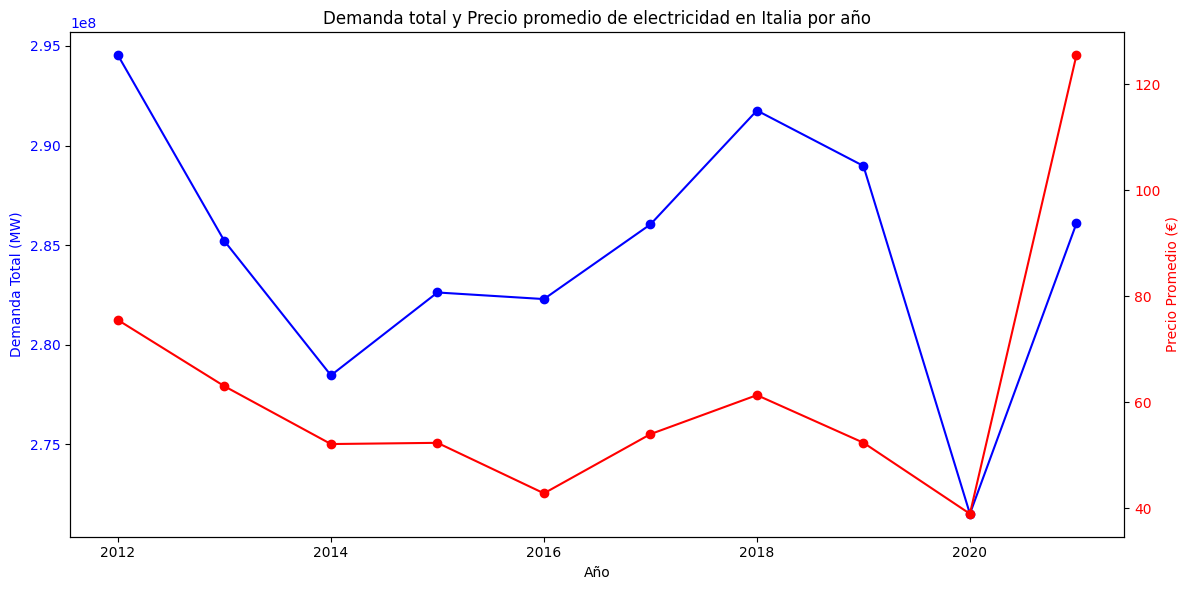

In [226]:
df_yearly = df_precios_mas_demanda.groupby('YEAR').agg(
    ITALIA_DEMAND=('ITALIA_DEMAND', 'sum'),  # Sumar la demanda total
    AVG_PRICE=('UNIQUE_NATIONAL_PRICE', 'mean')  # Promedio del precio por año
).reset_index()

# Crear el gráfico de líneas con dos ejes Y
fig, ax1 = plt.subplots(figsize=(12, 6))

# Graficar la demanda total
ax1.plot(df_yearly['YEAR'], df_yearly['ITALIA_DEMAND'], color='blue', label='Demanda Total (MW)', marker='o')
ax1.set_xlabel('Año')
ax1.set_ylabel('Demanda Total (MW)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Crear el segundo eje Y para los precios
ax2 = ax1.twinx()
ax2.plot(df_yearly['YEAR'], df_yearly['AVG_PRICE'], color='red', label='Precio Promedio (€)', marker='o')
ax2.set_ylabel('Precio Promedio (€)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Título y ajuste de leyenda
plt.title('Demanda total y Precio promedio de electricidad en Italia por año')

# Mostrar leyenda
fig.tight_layout()

# Mostrar el gráfico
plt.show()